In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def copiar_(image, nw, row, col):
  
  for r in range(row):
    nw[r, col:col+image.shape[1]] = image[0,]
  
  for r in range(row+image.shape[0], 2*row+image.shape[0]):
    nw[r, col:col+image.shape[1]] = image[image.shape[0]-1,]
  
  for c in range(col):
    nw[row:row+image.shape[0], c] = image[:,0]
  
  for c in range(col+image.shape[1], 2*col+image.shape[1]):
    nw[row:row+image.shape[0], c] = image[:,image.shape[1]-1]
  
  return nw

def filtro(image, mask):
  sr = mask.shape[0]//2
  sc = mask.shape[1]//2
  
  new_image = np.zeros((image.shape[0]+2*sr,
                        image.shape[1]+2*sc), np.float32)
  
  new_image[sr:sr+image.shape[0], sc:sc+image.shape[1]] = image
  new_image = copiar_(image, new_image, sr, sc)
 
  ans = np.zeros(new_image.shape, np.float32)
  
  for i in range(sr, image.shape[0]+sr):
    for j in range(sc, image.shape[1]+sc):
      aux = new_image[i-sr:i+sr+1,j-sc:j+sc+1]
      ans[i,j] = np.sum(aux*mask)
  
  return ans[sr:image.shape[0]+sr,sc:image.shape[1]+sc]

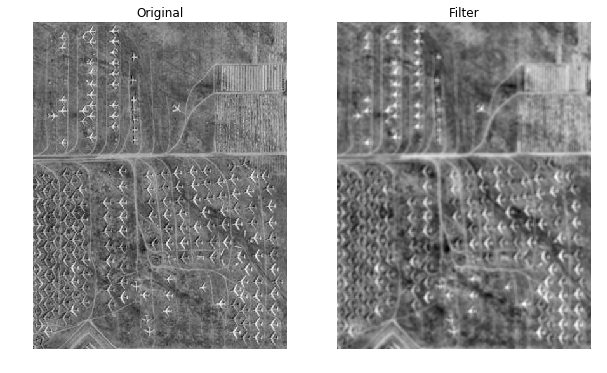

In [0]:
img = cv2.imread("Aviones.jpg", 0)

mask = (1/25)*np.ones((5, 5))

res = filtro(img, mask)

plt.figure(figsize=[10, 10])

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.title("Original")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(res, cmap="gray")
plt.title("Filter")

plt.show()